# DIRECT MARKETING CAMPAIGN OF PORTUGESE BANKING INSTITUION

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

SOURCE: https://data.world/data-society/bank-marketing-data

# SECTION 1

THIS SECTION IS TO EXPLORE OUR BANK DATA, THAT IS, CHECKING WHAT DATA TYPES THE FEATURES ARE MADE OF, THE SHAPE OF THE
DATA, WHAT FEATURES THERE ARE. I ALSO WANTED TO KNOW MORE ABOUT THE BANK CLIENTS, SO I SELECTED ONLY FEATURES THAT 
MET THAT CRITERIA

# Initial step is to explore the data 

In [2]:
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from scipy import stats
from __future__ import division
%matplotlib inline

In [3]:
df1 = pd.read_csv('bank_data/bank-full.csv',sep=';')
df2= pd.read_csv('bank_data/bank-additional-full.csv', sep=';')

In [4]:
df1.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [5]:
df2.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#rows and columns
print  'bank-full\n----------\n', df1.shape,'\n', '\n', 'bank-additional-full\n---------------------\n', df2.shape

bank-full
----------
(45211, 17) 

bank-additional-full
---------------------
(41188, 21)


In [7]:
#attributes
df1.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')

In [8]:
df2.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [9]:
#data types
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
#converting feature dtype to string
df1['y'] = df1.y.astype(str)

In [11]:
df2.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
#Analysing bank client data
"""these are the attributes of bank clients data -- 
age,job,marital,education,default,housing,loan"""

bank_clients = df2.ix[:,['age','job','marital','education','default','housing','loan','y']]

In [13]:
#summary statistics --only for age as its numerical
summary = bank_clients.describe()

In [14]:
print summary

               age
count  41188.00000
mean      40.02406
std       10.42125
min       17.00000
25%       32.00000
50%       38.00000
75%       47.00000
max       98.00000


In [15]:
#check unique entry for each categorical variable
print 'job\n','----\n',bank_clients.job.unique(),'\n\n','marital\n','--------\n', bank_clients.marital.unique(),'\n\n',\
'education\n','-------\n',bank_clients.education.unique(),'\n\n','default\n','-------\n',bank_clients.default.unique(),'\n\n',\
'housing\n','-------\n',bank_clients.housing.unique(),'\n\n','loan\n','-----\n',bank_clients.loan.unique()

job
----
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital
--------
['married' 'single' 'divorced' 'unknown'] 

education
-------
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default
-------
['no' 'unknown' 'yes'] 

housing
-------
['no' 'yes' 'unknown'] 

loan
-----
['no' 'yes' 'unknown']


# SECTION 2

THIS SECTION IS TO GO A STEP FURTHER IN EXPLORE THE CONTENTS OF OUR DATA THROUGH VISUALISATION. I PREFERRED BAR PLOT
AS IT MAKES INTERPRETATION EASY, AND WITH THIS DATA, IT GIVES AN IMMEDIATE FEEL OF WHAT THE NUMBERS ARE. THE OUTLIERS
ARE EASILY IDENTIFIABLE.

In [16]:
#creating a function to plot bank clients total numbers for each unit within a category
def catplot(x,data):
    sns.set(font_scale=1.6)
    sns.set_style('ticks')
    fig, ax = plt.subplots(figsize=(12,10))
    sns.countplot(x=x, data=data)
    if x=='job':
        ax.set_title('Job Category')
    elif x=='age':
        ax.set_title('Age Category')
    elif x=='marital':
        ax.set_title('Marital Category')
    elif x=='education':
        ax.set_title('Education Category')
    elif x=='default':
        ax.set_title('Default Category')
    elif x=='housing':
        ax.set_title('Housing Category')
    elif x=='loan':
        ax.set_title('Loan Category')
    plt.xticks(rotation=60, fontsize=20)
    for ann in ax.patches:
        ax.annotate("%.f" % ann.get_height(), (ann.get_x() * 1.006, ann.get_height() * 1.006))
    plt.show()

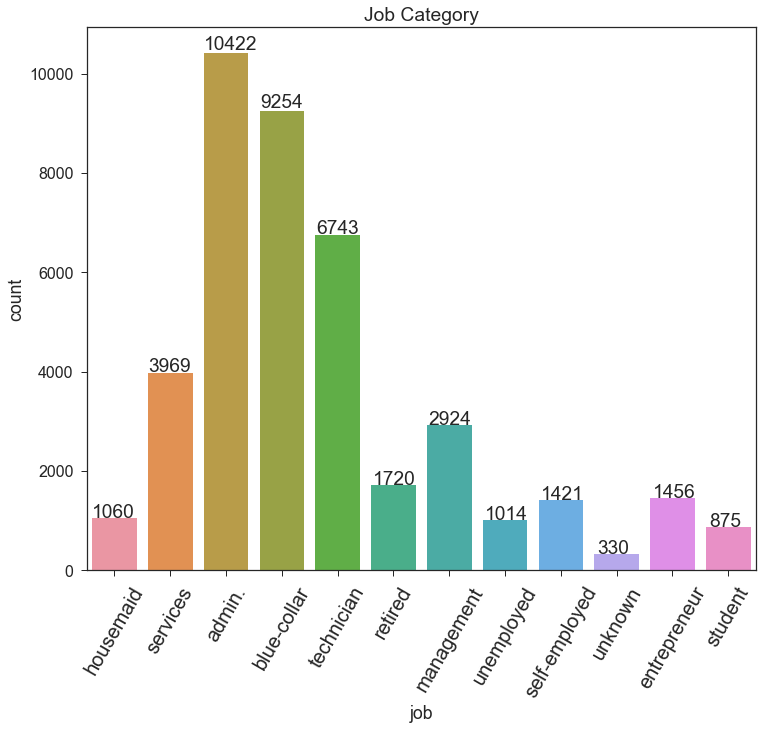

In [17]:
#plot for 'age','job','marital','education','default','housing','loan'
catplot('job',bank_clients)

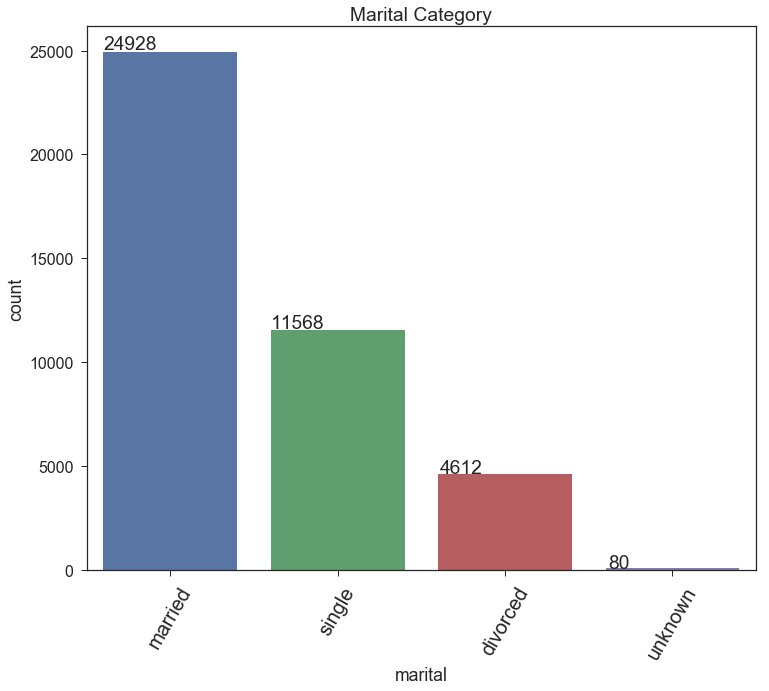

In [18]:
catplot('marital',bank_clients)

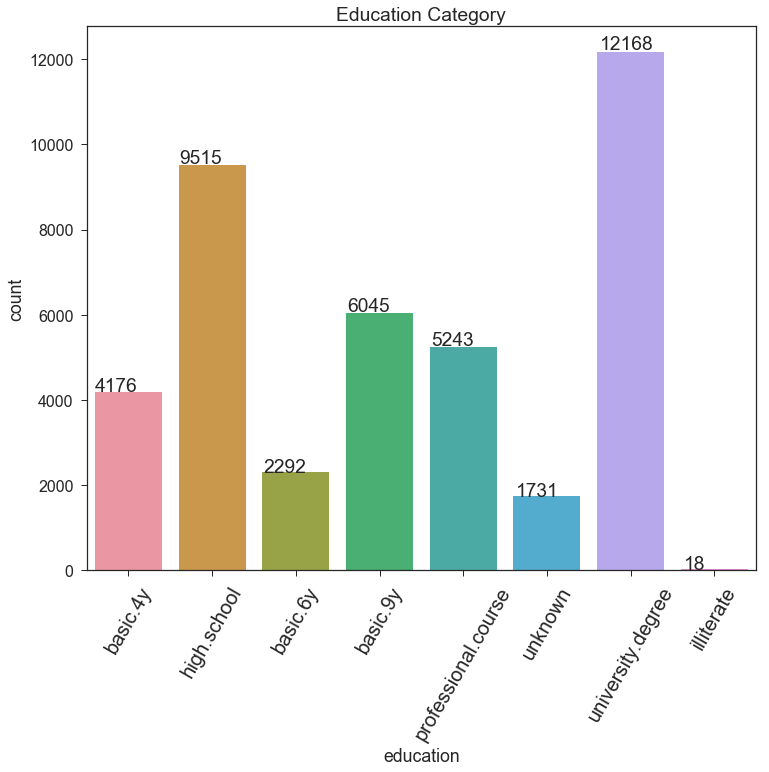

In [19]:
catplot('education',bank_clients)

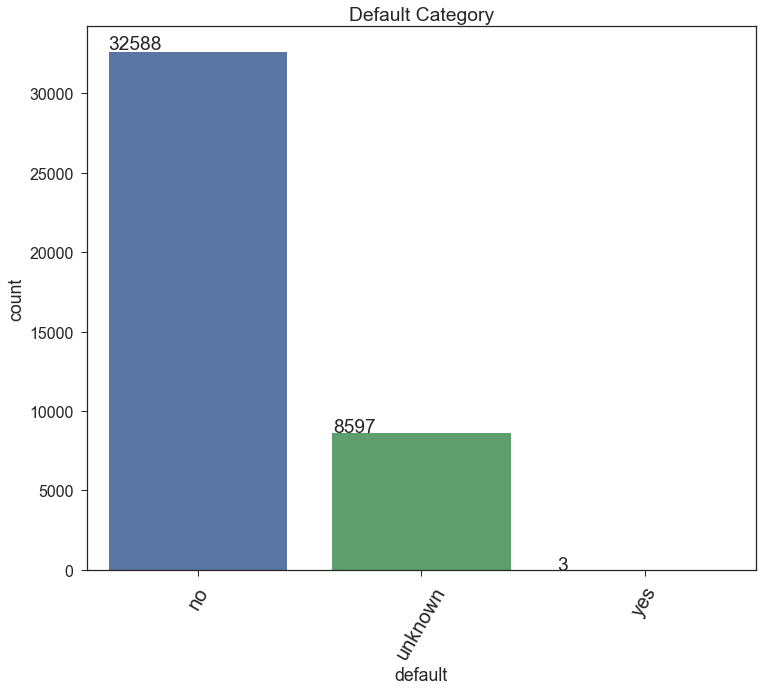

In [20]:
catplot('default',bank_clients)

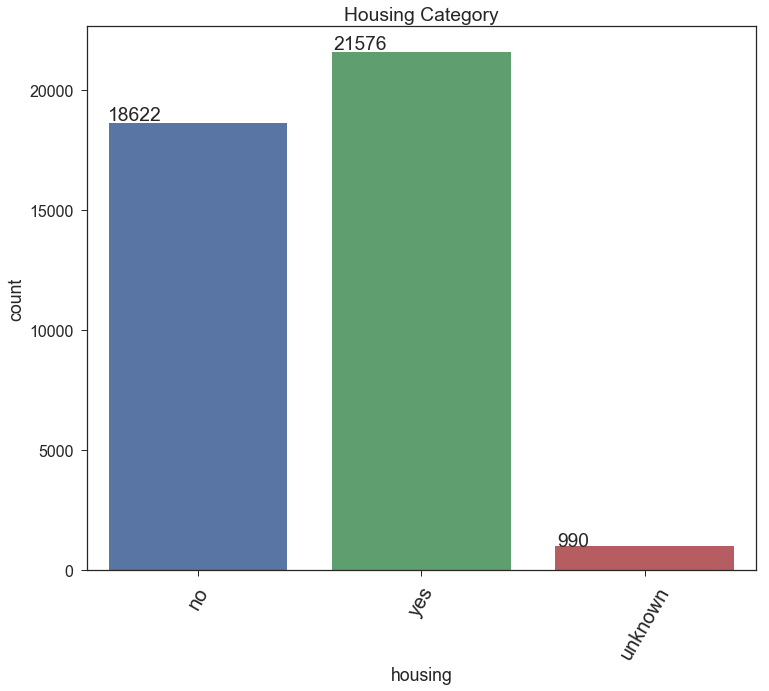

In [21]:
catplot('housing',bank_clients)

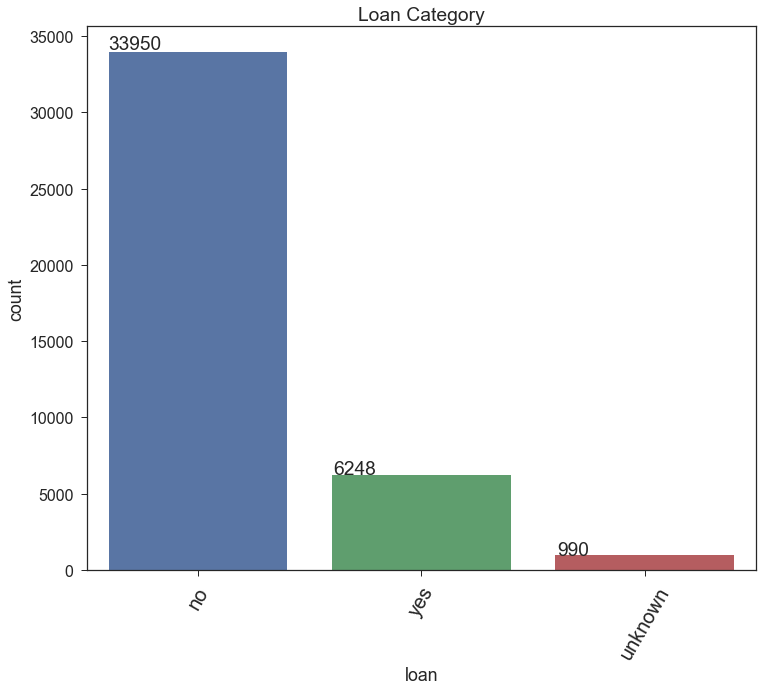

In [22]:
catplot('loan',bank_clients)

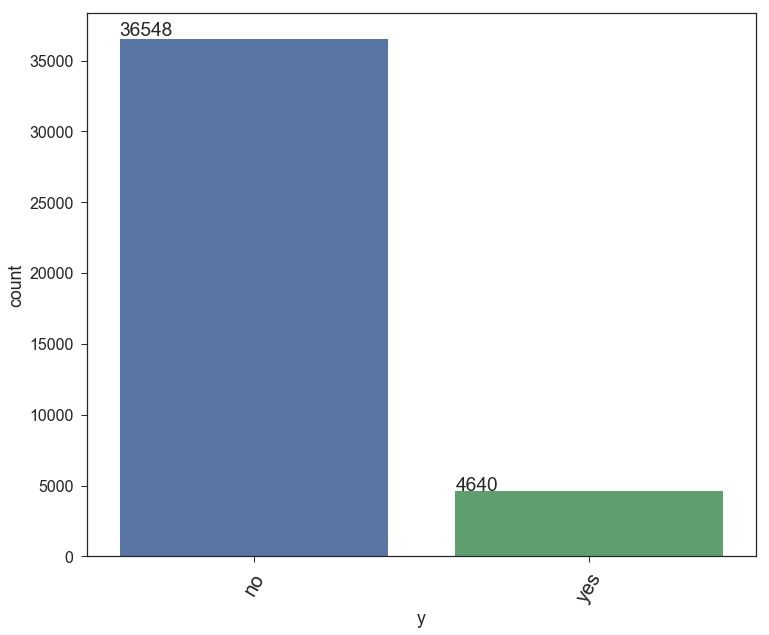

In [23]:
catplot('y',bank_clients)

# SECTION 3

THIS SECTION IS ABOUT ENCODING CATEGORICAL FEATURES AND BUILDING MODEL. FROM THE DISTRIBUTION BELOW, IT CAN BE 
OBSERVED THAT THERE ARE QUITE A NUMBER OF OUTLIERS IN THIS DATA, WHICH WILL MAKE OUR MODEL MORE OR LESS USELESS.
ENCODING THE CATEGORICAL FEATURE WITH ONE HOT ENCODING INCREASES THE NUMBER OF FEATURES FROM 8 TO 35. THIS IS JUST FOR
BANK CLIENTS DATA SELECTED ABOVE. APART FROM AGE, THE REST OF THE COLUMNS ARE 0s and 1s. 

In [32]:
#econding categorical variables 
new_encde = pd.get_dummies(bank_clients, columns=['job','marital','education','default','housing','loan'], drop_first=False)

In [33]:
# Encode column 'y' to numerical values. where yes = 1 and no = 0
new_encde['y'] = np.where(new_encde['y']=='yes', 1, 0)

In [239]:
#checking contents
new_encde.head(2)

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,57,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [36]:
#checking original dimension before encoding
bank_clients.shape

(41188, 8)

In [35]:
#checking dimension of encoded df
new_encde.shape

(41188, 35)

In [37]:
#count number of yes and no
def count_yes_no(data,target):
    counted=data[target]
    count1=0
    count2=0
    for x in counted:
        if x ==1:
            count1+=1
        if x==0:
            count2+=1
    return 'Total Yes: %d' % (count1),'Total No: %d' % (count2)

In [38]:
#printing number of yes's and no's
count_yes_no(new_encde,'y')

('Total Yes: 4640', 'Total No: 36548')

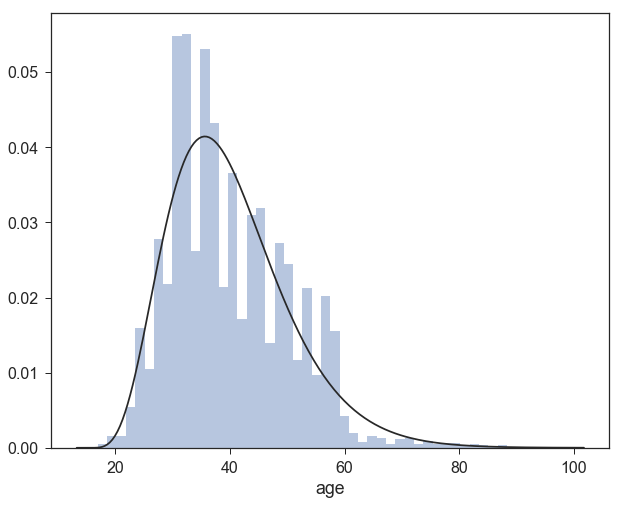

In [245]:
# Visualize skewed continuous features of encoded data
plt.figure(figsize=(10,8))
sns.distplot(new_encde.age, kde=False, fit=stats.gamma)

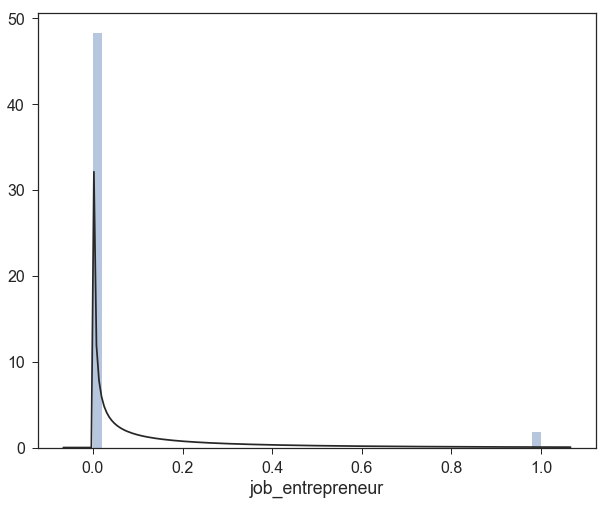

In [246]:
plt.figure(figsize=(10,8))
sns.distplot(new_encde.job_entrepreneur, kde=False, fit=stats.gamma)

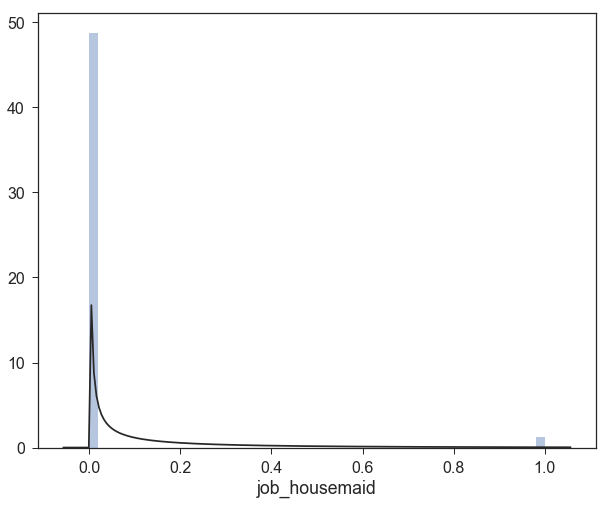

In [247]:
plt.figure(figsize=(10,8))
sns.distplot(new_encde.job_housemaid, kde=False, fit=stats.gamma)

# RANDOM FOREST

BUILDING A RANDOM FOREST MODEL ON ENCODED BANK CLIENTS DATA WITHOUT NORMALISING AND SCALING. THIS IS JUST BASED ON A
SUBSET OF THE FULL BANK DATA. THE IDEA IS TO CHECK IF WE CAN HAVE ANY MEANINGFUL MODEL BUILT, AND THE ANSWER IS 
DEFINITELY NO. OUR ACCURACY SCORE WAS QUITE HIGH, BUT THAT IS A DECEPTION IF YOU LOOK AT THE CLASSIFICATION RESULTS,
WITH PRECISION BEING 25% AND RECALL 10%. IT FELT LIKE A WASTE OF TIME, BUT IT WAS WORTH FINDING OUT WHAT TO EXPECT
WITH THIS APPROACH. THE FEATURE IMPORTANCE IDENTIFIED ONLY AGE AS AN IMPORTANT FEATURE IN BUILDING THIS MODEL. WELL,
IT'S IRREVELANT IF ITS IMPORTANT OR NOT ARE WE CLEARLY KNOW, THIS MODEL IS NO GOOD. FURTHER EVIDENCE IS PROVIDED BY
AUC AND ROC CURVE, SHOWING HOW ABYSMAL OUR MODEL IS. THE NEXT SECTION INVOLVES USING THE FULL BANK DATA, NORMALISING
AND SCALING THE DATA BEFORE BUILDING THE MODEL. WE WILL FIND OUT ITS PERFORMANCE RELATIVE TO THE BANK CLIENT DATA 
MODEL. LETS GO....

In [39]:
#scaling and normalizing data
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [248]:
#SELECTING FEATURES AND TARGET LABEL
X = new_encde.drop('y',axis=1)
y = new_encde['y']

In [249]:
# Log-transform the skewed features
#select the skewed features
new_encde_cpy = new_encde.copy()

In [250]:
#selecting dataframe with skewed values
new_encde_cpy= new_encde_cpy.iloc[:,:35]

In [251]:
new_encde_cpy.head(2)

,age,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,57,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [252]:
#take fixed holdout set 30% of data rows
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=531)

EVALUATING MODEL

In [56]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [57]:
#PRINTING CLASSIFICATION REPORT
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7320
           1       0.25      0.10      0.14       918

   micro avg       0.87      0.87      0.87      8238
   macro avg       0.57      0.53      0.54      8238
weighted avg       0.82      0.87      0.84      8238



In [59]:
#checking model accuracy
acc = accuracy_score(y_test, prediction)

In [60]:
#show result
acc

0.8669579995144453

In [58]:
#PRINTING CONFUSION MATRIX
print(confusion_matrix(y_test,prediction))

[[7050  270]
 [ 826   92]]


PLOTTING FEATURE IMPORTANCE

In [49]:
'''creating feature names for plotting'''
#removing income from list of column names as its the target variable
colnames = list(new_encde.columns.values)

In [50]:
#deleting income label
del colnames[1]

In [51]:
# Plot feature importance
f_Importance = rf_model.feature_importances_
# normalize by max importance
f_Importance = f_Importance / f_Importance.max()

In [52]:
# Sort feature importances in ascending order
idxSorted = np.argsort(f_Importance)

In [53]:
#positioning the bar
barPos = np.arange(idxSorted.shape[0])

In [54]:
# Rearrange feature names so they match the sorted feature importances
coln = [colnames[i] for i in idxSorted]

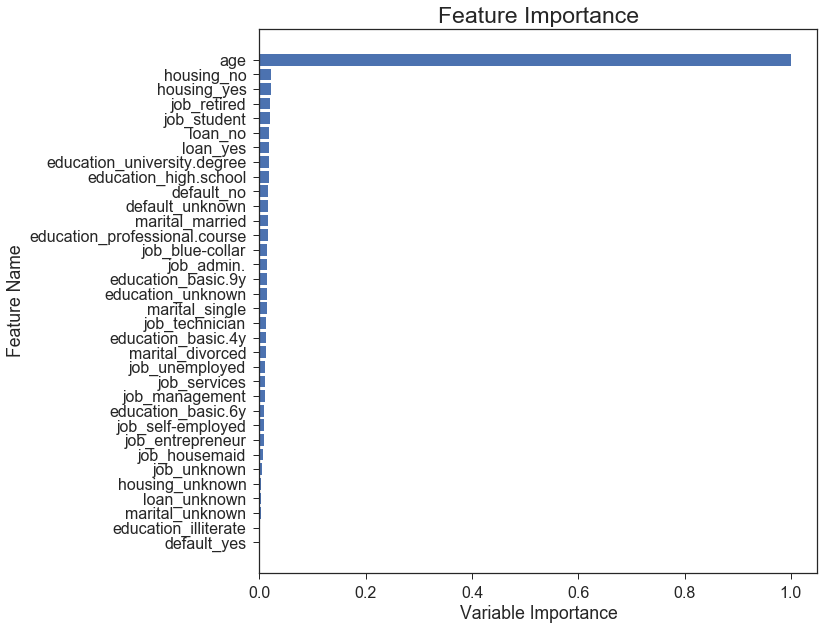

In [55]:
#plot importance of all features
# Create plot size
plt.figure(figsize=(10,10))
# Create plot title
plt.title('Feature Importance', fontsize=23)
plt.barh(barPos, f_Importance[idxSorted], align='center')
# Add feature names as y-axis labels
plt.yticks(barPos, coln)
#assign label to x-axis
plt.xlabel('Variable Importance')
#assign label to y-axis
plt.ylabel('Feature Name')
plt.show()

PLOTTING AUC & ROC CURVE

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve

In [62]:
# compute auc on test set as function of ensemble size
auc = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None
    maxFeat  = 4 #try tweaking
    randf_model = RandomForestClassifier(n_estimators=
                             iTrees, max_depth=depth, max_features=
                             maxFeat, oob_score=False, random_state=531)
    randf_model.fit(X_train,y_train)
    #Accumulate auc on test set
    preds = randf_model.predict_proba(X_test)
    aucCalc = roc_auc_score(y_test, preds[:,1:35]) # prediction for age column as important variable
    auc.append(aucCalc)

In [63]:
print 'The AUC is %s' % (auc[-1])

The AUC is 0.612588916866


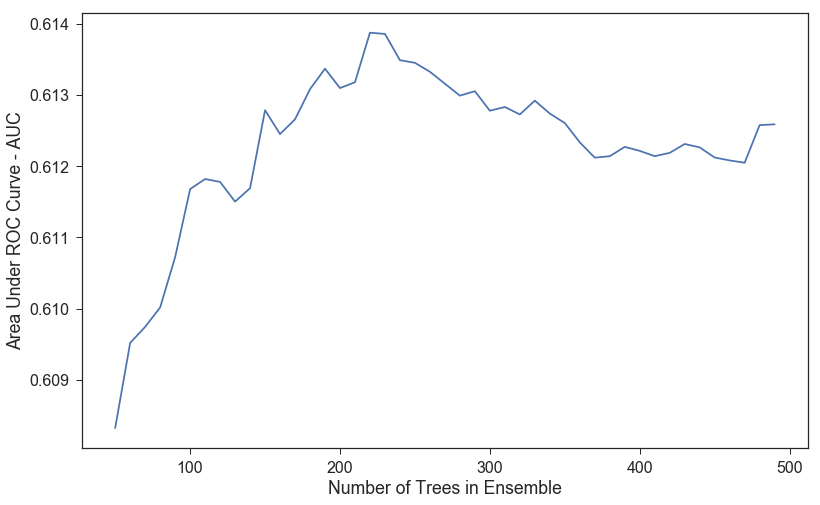

In [64]:
#plot training and test errors vs number of trees in ensemble
plt.figure(figsize=(13,8))
plt.plot(nTreeList, auc)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.show()

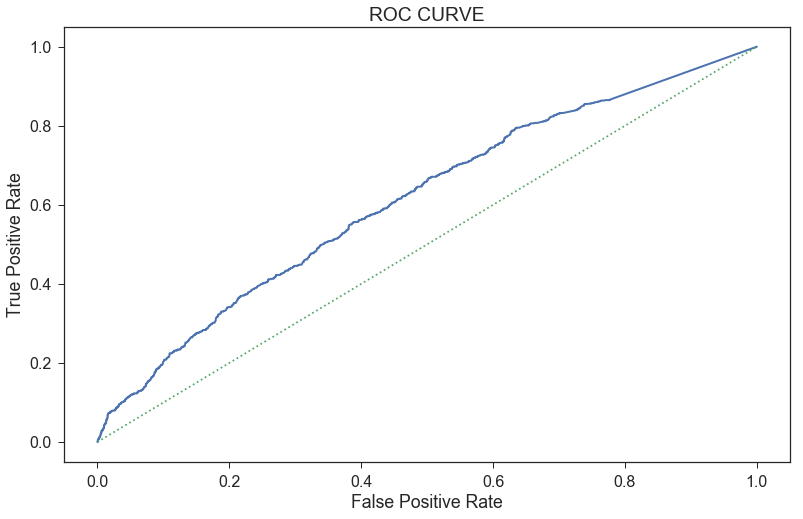

In [65]:
#plot best version of ROC curve
fpr, tpr, thresh = roc_curve(y_test, list(preds[:,1:35]))
ctClass = [i*0.01 for i in range(101)]
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot(ctClass, ctClass, linestyle=':')
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# SECTION 4

# WORKING WITH FULL DATASET

ONE THING MUST BE POINTED OUT HERE REGARDING THE ABOVE MODEL; THE LABEL WAS IMBALANCED, THUS, GIVING US A POOR OUTCOME.
THE NUMBER OF YES IS 4,640 AND NO IS 36,548; SO IT MAKES SENSE WHY WE LITERALY HAD NEXT TO NO MODEL. THE FIRST STEP I
TOOK IN ADDRESSING THIS ISSUE IS TO CREATE AN ARTIFICIAL BALANCE OF THE DATA USING A SPECIAL FEATURE CALLED 'SMOTE'
(Synthetic Minority Oversampling TEchnique). THIS TECHNIQUE INCREASE THE UNDER REPRESENTED DATA (LABEL) TO HAVE SIMILAR OR 
EQUAL NUMBER OF RECORDS AS THE REMAINING FEATURES. THE NUMBER OF FEATURES AND LABEL RECORDS AFTER APPLYING SMOTE IS
73,096. THE NEXT STEP WAS TO NORMALISE THE DATA DUE TO SEVERAL DEGREES OF OUTLIERS. E.G pdays COLUMN HAS VALUE 999, 
MEANING NO CUSTOMER WAS CONTACTED, BUT IF INCLUDED IN THE DATA, IT'LL MEAN THE CUSTOMER WAS CONTACTED 999 TIMES, WHICH 
WILL BE FALSE. FOR NOW, I HAVE LEFT THE VALUE AND APPLIED THE NORMALISING/SCALING TECHNIQUE, TO KEEP ALL VALUES WITHIN
THE SAME SCALE. AND FINALLY I FIT THE NORMALISED/SCALED DATA INTO A RANDOM FOREST CLASSIFIER. AND YES, YOU GUESSED IT,
THE RESULTS WAS AMAZING. THE VALIDATION SCORE WAS 94% AND IT IMPROVED ON THE TEST SCORE WHICH WAS 98%. THE RECALL
ON VALIDATION WAS 92% AND TEST SCORE 97%, ANOTHER IMPROVEMENT OF THE MODEL. THE CLASSIFICATION RESULTS ALSO SHOWS HOW 
GOOD THE MODEL IS. OUR PRECISION WAS 99% IN PREDICTING NO'S AND 97% PREDICTING YES'S. ANOTHER CONFIRMATION WAS TO USE
AUC AND ROC CURVE TO EVALUATE THE MODEL. OUR AUC SCORE WAS 98% WHICH IS ACTUALLY PERFECT, AND THE ROC CURVE PULLS 
TO THE LEFT CORNER, INDICATING A GREAT MODEL AS OUR TRUE POSITIVE RATE IS APPROACHING 1. THE TOP THREE IMPORTANT FEATURES
ARE NUMBER EMPLOYED, EURIBOR3M, AND AGE. CLEARLY, IF A BANK HAS MORE EMPLOYEES, THEY'LL' BE EFFECTIVE IN THE MARKETING
CAMPAIGN AS THEY HAVE NUMBERS TO REACH OUT TO MORE CUSTOMERS AND AS MANY TIMES PER CUSTOMER AS POSSIBLE. THE EURIBOR 
THREE MONTHS IS AN ECONOMIC INDICATOR WHICH IS THE INTEREST RATE AT WHICH A SELECTION OF EUROPEAN BANKS 
LEND ONE ANOTHER FUNDS DENOMINATED IN EUROS WHEREBY THE LOANS HAVE A MATURITY OF 3 MONTHS. A HIGHER RATE MEANS HIGHER 
RETURNS FOR THE LENDING BANK. THE AGE OF THE CUSTOMER IS ALSO IMPORTANT AS OLDER CUSTOMERS, ESPECIALLY WORKING CLASS
CUSTOMERS ARE MORE LIKELY TO ACCEPT A TERM DEPOSIT.

In [87]:
#copy full bank data under new name
bnk_data_full = df2.copy()

In [88]:
#print sample of data
bnk_data_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [89]:
#print df columns
print bnk_data_full.columns.values, '\n\n------' 
print '\nTotal columns: %d' % len(bnk_data_full.columns.values)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y'] 

------

Total columns: 21


In [90]:
#print datatypes
bnk_data_full.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [91]:
'''the duration is not known until call is made. also after the end of the call 'y' is obviously known. the 'duration'
should only be included for benchmark purposes and should be discarded if the
intention is to have a realistic predictive model. e.g if duration = 0, then 'y'='no'

'''

bnk_data_full = bnk_data_full.drop('duration',axis=1)

In [92]:
#printing output to check if 'duration' has been removed
bnk_data_full.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [93]:
'''enconding categorical variables. firstly, i had to select all categorical features to encode'''
bnk_cat = bnk_data_full.select_dtypes(include=['object'])
#drop 'y'
bnk_cat = bnk_cat.drop('y',axis=1)

In [94]:
#print sample results
bnk_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [95]:
#encoding features to 0s and 1s
bnk_cat_encde = pd.get_dummies(bnk_cat)

In [96]:
#print sample results
bnk_cat_encde.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [97]:
#select all numerical features including floats
num_flt_bnk = bnk_data_full.select_dtypes(exclude=['object'])

In [98]:
#concatenate numerical and float features with encoded categorical features to get all features as numbers/floats
encoded_bnk_data = pd.concat([num_flt_bnk,bnk_cat_encde],axis=1)

In [99]:
#print sample results
encoded_bnk_data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [100]:
#encode target column to 0s for no and 1s for yes
# Encode column 'y' to numerical values. where yes = 1 and no = 0
bnk_data_full['y'] = np.where(bnk_data_full['y']=='yes', 1, 0)

In [101]:
#now join target column to feature df
encoded_bnk_data_full = pd.concat([encoded_bnk_data,bnk_data_full.y],axis=1)

In [102]:
#print sample results
encoded_bnk_data_full.head(2)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


In [103]:
#check columns and count how many 
print encoded_bnk_data_full.columns.values,'\n\n-------\n'
print 'Total columns: %d' % len(encoded_bnk_data_full.columns.values)

['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed' 'job_admin.' 'job_blue-collar'
 'job_entrepreneur' 'job_housemaid' 'job_management' 'job_retired'
 'job_self-employed' 'job_services' 'job_student' 'job_technician'
 'job_unemployed' 'job_unknown' 'marital_divorced' 'marital_married'
 'marital_single' 'marital_unknown' 'education_basic.4y'
 'education_basic.6y' 'education_basic.9y' 'education_high.school'
 'education_illiterate' 'education_professional.course'
 'education_university.degree' 'education_unknown' 'default_no'
 'default_unknown' 'default_yes' 'housing_no' 'housing_unknown'
 'housing_yes' 'loan_no' 'loan_unknown' 'loan_yes' 'contact_cellular'
 'contact_telephone' 'month_apr' 'month_aug' 'month_dec' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep'
 'day_of_week_fri' 'day_of_week_mon' 'day_of_week_thu' 'day_of_week_tue'
 'day_of_week_wed' 'poutcome_failure' 'poutcome_nonexistent'


In [104]:
#counting number of 0s and 1s
encoded_bnk_data_full.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

# RESAMPLING DATA USING SMOTE

In [105]:
#import module
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score

In [106]:
#select training and test features
bnk_features = encoded_bnk_data_full.drop('y',axis=1)
bnk_target = encoded_bnk_data_full['y']

In [107]:
#splitting data into training and test
X1_train, X1_test, y1_train, y1_test = train_test_split(bnk_features, bnk_target, test_size=0.20, random_state=531)

In [108]:
#call oversampling instance
smote = SMOTE(ratio='minority')
#fit oversampling instance to data
X_sm, y_sm = smote.fit_sample(bnk_features, bnk_target)

In [259]:
print 'feature count: %d' % (len(X_sm))
print 'target count: %d' % (len(y_sm))

feature count: 73096
target count: 73096


In [109]:
#lets check validation results
rf = RandomForestClassifier(n_estimators=20, random_state=531)
rf.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=531, verbose=0, warm_start=False)

In [110]:
print 'Validation Results'
print rf.score(X1_test, y1_test)
print recall_score(y1_test, rf.predict(X1_test))
print '\nTest Results'
print rf.score(bnk_features, bnk_target)
print recall_score(bnk_target, rf.predict(bnk_features))

Validation Results
0.987982520029
0.921568627451

Test Results
0.989827134117
0.932543103448


In [111]:
#print classification report
print (classification_report(y1_test,rf.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7320
           1       0.97      0.92      0.94       918

   micro avg       0.99      0.99      0.99      8238
   macro avg       0.98      0.96      0.97      8238
weighted avg       0.99      0.99      0.99      8238



# NORMALIZING RESAMPLED DATA AND FITTING MODEL AGAIN

In [112]:
names_2 = list(encoded_bnk_data_full.columns.values)
del names_2[-1]

In [113]:
data_1 = pd.DataFrame(X_sm,columns=names_2)

In [114]:
data_2 = pd.DataFrame(y_sm,columns=['y'])

In [115]:
mrg_data = pd.concat([data_1,data_2], axis=1)

In [116]:
#creating instance of scaler
feature_scaled_1 = MinMaxScaler()

In [117]:
#fit data with scaler
print feature_scaled_1.fit(mrg_data)

MinMaxScaler(copy=True, feature_range=(0, 1))


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [118]:
#transform data 
scaled_1 = feature_scaled_1.transform(mrg_data)

In [119]:
#select names to assign to series
names_1 = list(mrg_data.columns.values)

In [120]:
#create new dataframe
transf_bnk_data = pd.DataFrame(scaled_1,columns=names_1)

In [121]:
#check sample results
transf_bnk_data.head(2)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# RE-BUILDING RANDDOM FOREST MODEL ON NORMALISED DATA

In [122]:
#select training and test features
bnk_features_2 = transf_bnk_data.drop('y',axis=1)
bnk_target_2 = transf_bnk_data['y']

In [123]:
#splitting data into training and test
X2_train, X2_test, y2_train, y2_test = train_test_split(bnk_features_2, bnk_target_2, test_size=0.20, random_state=531)

In [124]:
#lets check validation results
rf_2 = RandomForestClassifier(n_estimators=20, random_state=531)
rf_2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=531, verbose=0, warm_start=False)

In [125]:
print 'Validation Results'
print rf_2.score(X2_test, y2_test)
print recall_score(y2_test, rf_2.predict(X2_test))
print '\nTest Results'
print rf_2.score(bnk_features_2, bnk_target_2)
print recall_score(bnk_target_2, rf_2.predict(bnk_features_2))

Validation Results
0.941313269494
0.922740325448

Test Results
0.983925248988
0.977782642005


In [126]:
#print classification report
print (classification_report(y2_test,rf_2.predict(X2_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      7307
         1.0       0.96      0.92      0.94      7313

   micro avg       0.94      0.94      0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



In [127]:
# Plot feature importance
f_Importance_2 = rf_2.feature_importances_
# normalize by max importance
f_Importance_2 = f_Importance_2 / f_Importance_2.max()

In [128]:
# Sort feature importances in ascending order
idxSorted_2 = np.argsort(f_Importance_2)

In [129]:
#positioning the bar
barPos_2 = np.arange(idxSorted_2.shape[0])

In [130]:
# Rearrange feature names so they match the sorted feature importances
coln_2 = [names_1[i] for i in idxSorted_2]

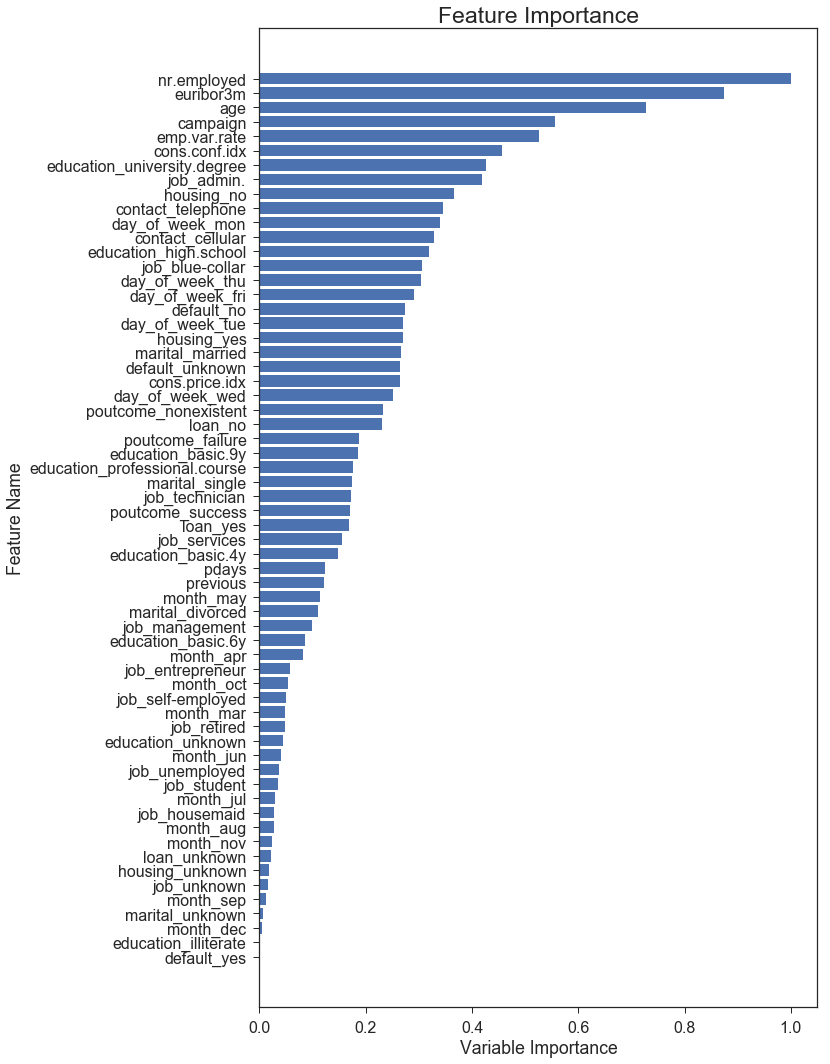

In [131]:
#plot importance of all features
# Create plot size
plt.figure(figsize=(10,18))
# Create plot title
plt.title('Feature Importance', fontsize=23)
plt.barh(barPos_2, f_Importance_2[idxSorted_2], align='center')
# Add feature names as y-axis labels
plt.yticks(barPos_2, coln_2)
#assign label to x-axis
plt.xlabel('Variable Importance')
#assign label to y-axis
plt.ylabel('Feature Name')
plt.show()

In [234]:
# compute auc on test set as function of ensemble size
auc2 = []
nTreeList2 = range(50, 500, 10)
for iTrees in nTreeList2:
    depth2 = None
    maxFeat2  = 4 #try tweaking
    randf_model2 = RandomForestClassifier(n_estimators=
                             iTrees, max_depth=depth2, max_features=
                             maxFeat2, oob_score=False, random_state=531)
    randf_model2.fit(X2_train,y2_train)
    #Accumulate auc on test set
    preds2 = randf_model2.predict_proba(X2_test)
    aucCalc2 = roc_auc_score(y2_test, preds2[:,1:35]) # prediction for age column as important variable
    auc2.append(aucCalc2)

In [240]:
#results of 4 features
print 'The AUC is %s' % (auc2[-1])

The AUC is 0.97976889814


In [238]:
# compute auc on test set as function of ensemble size
auc2 = []
nTreeList2 = range(50, 500, 10)
for iTrees in nTreeList2:
    depth2 = None
    maxFeat2  = 6 #try tweaking
    randf_model2 = RandomForestClassifier(n_estimators=
                             iTrees, max_depth=depth2, max_features=
                             maxFeat2, oob_score=False, random_state=531)
    randf_model2.fit(X2_train,y2_train)
    #Accumulate auc on test set
    preds2 = randf_model2.predict_proba(X2_test)
    aucCalc2 = roc_auc_score(y2_test, preds2[:,1:35]) # prediction for age column as important variable
    auc2.append(aucCalc2)

In [241]:
#results of 6 features
print 'The AUC is %s' % (auc2[-1])

The AUC is 0.97976889814


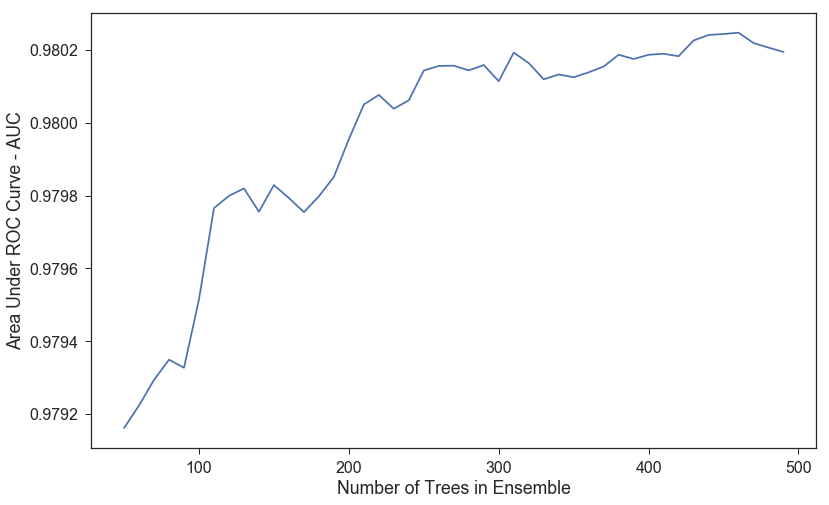

In [236]:
#plot training and test errors vs number of trees in ensemble
plt.figure(figsize=(13,8))
plt.plot(nTreeList2, auc2)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Area Under ROC Curve - AUC')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.show()

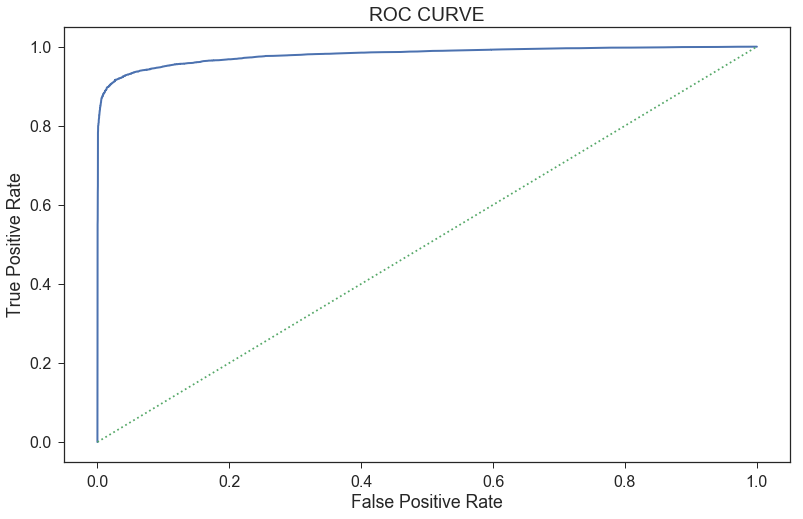

In [237]:
#plot best version of ROC curve
fpr2, tpr2, thresh2 = roc_curve(y2_test, list(preds2[:,1:35]))
ctClass2 = [i*0.01 for i in range(101)]
plt.figure(figsize=(13,8))
plt.plot(fpr2, tpr2, linewidth=2)
plt.plot(ctClass2, ctClass2, linestyle=':')
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# SECTION 5

THIS SECTION IS A COPY OF SECTION 4, WITH THE ONLY DIFERENCE BEING CHANGING THE pdays 999 VALUE TO 0, JUST TO OBSERVE ANY 
SIGNIFICANT CHANGE. THE VALIDATION AND TEST SCORES SHOWED LITTLE CHANGE COMPATED TO SECTION 4 RESULTS, SO IT REALLY DOES NOT MATTER, AS LONG AS THE DATA IS NORMALISED/SCALED. 

In [260]:
#create copy of dataframe#########################################
bnk_data_full_copy = bnk_data_full.copy()

In [261]:
#assign 0 for pdays where entry is 999 as it means there was no contact with customer###############################
bnk_data_full_copy.pdays[bnk_data_full_copy.pdays == 999]   = 0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [262]:
#check for unique values of pdays######################################
bnk_data_full_copy.pdays.unique()

array([ 0,  6,  4,  3,  5,  1, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15, 16,
       21, 17, 18, 22, 25, 26, 19, 27, 20])

In [263]:
#copy##################################################
'''enconding categorical variables. firstly, i had to select all categorical features to encode'''
bnk_cat_copy = bnk_data_full_copy.select_dtypes(include=['object'])

In [264]:
#encoding features to 0s and 1s########################################
bnk_cat_encde_copy = pd.get_dummies(bnk_cat_copy)

In [265]:
#select all numerical features including floats##################################
num_flt_bnk_copy = bnk_data_full_copy.select_dtypes(exclude=['object'])

In [266]:
#concatenate numerical and float features with encoded categorical features to get all features as numbers/floats#####
encoded_bnk_data_copy = pd.concat([num_flt_bnk_copy,bnk_cat_encde_copy],axis=1)

In [267]:
encoded_bnk_data_copy.head(2)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [268]:
#select training and test features
bnk_features_copy = encoded_bnk_data_copy.drop('y',axis=1)
bnk_target_copy = encoded_bnk_data_copy['y']

In [269]:
#splitting data into training and test
X1_train_copy, X1_test_copy, y1_train_copy, y1_test_copy = train_test_split(bnk_features_copy, bnk_target_copy, test_size=0.20, random_state=531)

In [270]:
#call oversampling instance
smote_copy = SMOTE(ratio='minority')
#fit oversampling instance to data
X_sm_copy, y_sm_copy = smote_copy.fit_sample(bnk_features_copy, bnk_target_copy)

In [271]:
#lets check validation results
rf_copy = RandomForestClassifier(n_estimators=20, random_state=531)
rf_copy.fit(X_sm_copy, y_sm_copy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=531, verbose=0, warm_start=False)

In [272]:
names_2_copy = list(encoded_bnk_data_copy.columns.values)
del names_2_copy[9]

In [273]:
data_1_copy = pd.DataFrame(X_sm_copy,columns=names_2_copy)

In [274]:
data_2_copy = pd.DataFrame(y_sm_copy,columns=['y'])

In [275]:
mrg_data_copy = pd.concat([data_1_copy,data_2_copy], axis=1)

In [276]:
#creating instance of scaler
feature_scaled_1_copy = MinMaxScaler()

In [277]:
#fit data with scaler
print feature_scaled_1_copy.fit(mrg_data_copy)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [278]:
#transform data 
scaled_1_copy = feature_scaled_1_copy.transform(mrg_data_copy)

In [279]:
#select names to assign to series
names_1_copy = list(mrg_data_copy.columns.values)

In [280]:
#create new dataframe
transf_bnk_data_copy = pd.DataFrame(scaled_1_copy,columns=names_1_copy)

In [281]:
#check sample results
transf_bnk_data_copy.head(2)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,0.481481,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.493827,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [282]:
#select training and test features
bnk_features_2_copy = transf_bnk_data_copy.drop('y',axis=1)
bnk_target_2_copy = transf_bnk_data_copy['y']

In [283]:
#splitting data into training and test
X2_train_copy, X2_test_copy, y2_train_copy, y2_test_copy = train_test_split(bnk_features_2_copy, bnk_target_2_copy, test_size=0.20, random_state=531)

In [284]:
#lets check validation results
rf_2_copy = RandomForestClassifier(n_estimators=20, random_state=531)
rf_2_copy.fit(X2_train_copy, y2_train_copy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=531, verbose=0, warm_start=False)

In [285]:
print 'Validation Results'
print rf_2_copy.score(X2_test_copy, y2_test_copy)
print recall_score(y2_test_copy, rf_2_copy.predict(X2_test_copy))
print '\nTest Results'
print rf_2_copy.score(bnk_features_2_copy, bnk_target_2_copy)
print recall_score(bnk_target_2_copy, rf_2_copy.predict(bnk_features_2_copy))

Validation Results
0.940218878249
0.920962669219

Test Results
0.983761081318
0.977645835613


In [286]:
# Plot feature importance
f_Importance_2_copy = rf_2_copy.feature_importances_
# normalize by max importance
f_Importance_2_copy = f_Importance_2_copy / f_Importance_2_copy.max()

In [287]:
# Sort feature importances in ascending order
idxSorted_2_copy = np.argsort(f_Importance_2_copy)

In [288]:
#positioning the bar
barPos_2_copy = np.arange(idxSorted_2_copy.shape[0])

In [289]:
# Rearrange feature names so they match the sorted feature importances
coln_2_copy = [names_1_copy[i] for i in idxSorted_2_copy]

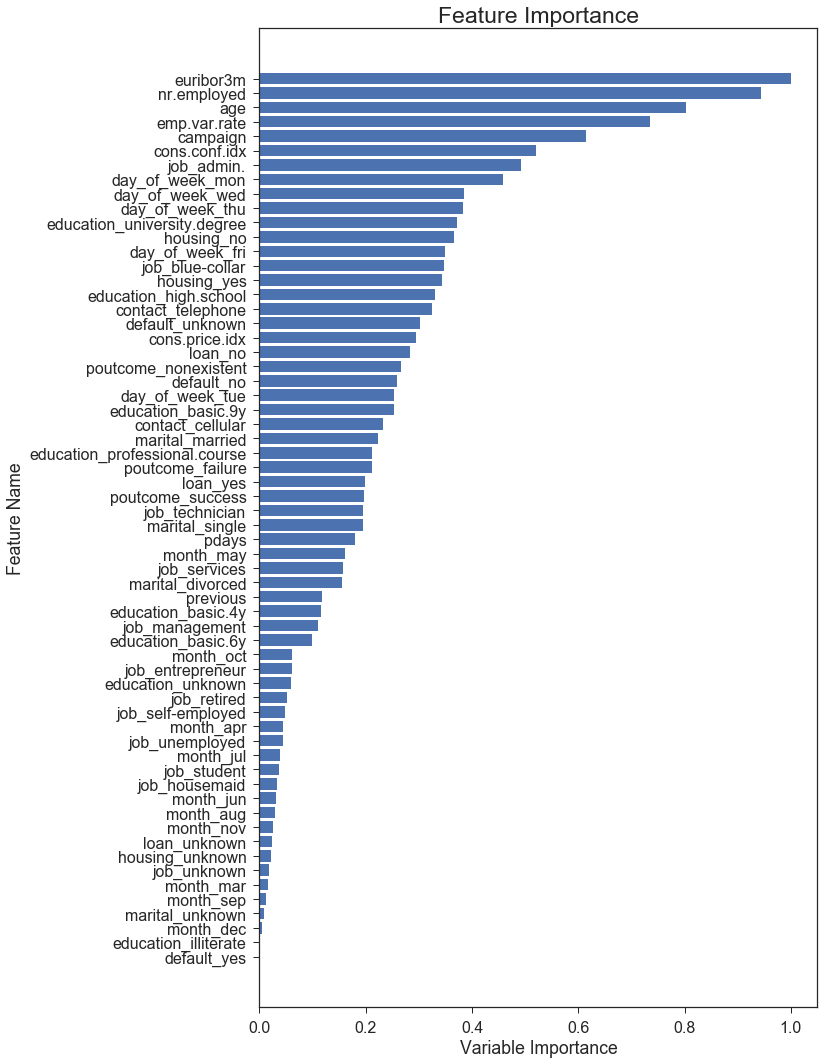

In [290]:
#plot importance of all features
# Create plot size
plt.figure(figsize=(10,18))
# Create plot title
plt.title('Feature Importance', fontsize=23)
plt.barh(barPos_2_copy, f_Importance_2_copy[idxSorted_2_copy], align='center')
# Add feature names as y-axis labels
plt.yticks(barPos_2_copy, coln_2_copy)
#assign label to x-axis
plt.xlabel('Variable Importance')
#assign label to y-axis
plt.ylabel('Feature Name')
plt.show()